#Introduction to Python 3
In this file we will become familiar with a *for* loop for performing repeating tasks and when we need to iterate a function. We will then introduce the Euler's Method to solve a second order differential equation numerically.


## *for* loop statement

In programming, for recurring calculations we can use a *for* loop.

The statement of a *for* loop has two parts, the number of iterations that indicates how many times our program needs to go through the loop for performing a task or a series of tasks, and the indentation part, which has the steps required for completing the task(s). After going through all of the required number of loops the program exits the *for* loop and go to the next code line.

Sometimes, for the first round of the loop, we will need to provide the initial values of the variables to begin with. For that you can define variables and assign values to them in the lines above the *for* loop in your program.

For example, the code below is using a *for* loop for printing the values from 0 to 4. There are different ways to indicate the number of loops such as using the *range* statement or the *linspace* statement.

The example below uses the *range* statement and the next example uses the *linspace* statement.

One of the syntax for the *range* statement is (starting point, ending point). This statement gives a range of values from the starting point by increments of 1. The ending point will not be part of the range of values.

Note the presence of the colon on the *for* statement, and the indentation of all code that is run repeatedly.



In [1]:
#This program prints the values of the range in each iteration of the for loop.
#Note the range command excludes the endpoint.
for r in range(1, 5):
  print (r)

1
2
3
4


In [2]:
#This program prints the values of the linspace in each iteration of the for loop.

from numpy import linspace
t=linspace(1, 4, 4)

for r in t:
  print (int(r))
  #The int syntax above will print the values in integer format.

1
2
3
4


## Euler's Method

We can solve a second order differential equation by breaking it down into two first order differential equations, one for the position and one for the velocity. We will use the Taylor series expansion to write the equations.


### Taylor series expansion

If we have the value of a function $f(t)$ at time $t$ we can expand the function to find its value at time $t+h$, where $h$ is a small division in time.


$f(t+h)$ =$f(t)$+${h}\frac{df}{dt}$+$\frac{1}{2!}h^2\frac{d^2f}{dt^2}$+ $\frac{1}{3!}h^3\frac{d^2f}{dt^2}+\ldots$

If the function spans the time interval of $[a, b]$ we can define $h=\frac{(b-a)}{N}$, where $N$ is the number of divisions. $N$ and $h$ are inversely proportional to each other.

For $N=100$, $h$ will be in the order of $\frac{1}{100}$, which means the third term in the series becomes in the order of $10^{-4}$. So we can neglect the higher order terms compared to the first two terms in the series expansion, provided the higher derivatives are not themselves very large. The Taylor series approximation becomes:

$f(t+h)\approx f(t)$+${h}\frac{df}{dt}$

### Euler's method for postion and velocity equations

We can use the functional form above to write the Taylor series expansion of the positions and velocity functions as below:

$x(t+h)$=$x(t)$+$h\frac{dx}{dt}$

$v(t+h)$=$v(t)$+$h\frac{dv}{dt}$


If we replace $\frac{dx}{dt}$ in the first equation by velocity, $v(t)$, and replace $\frac{dv}{dt}$ by acceleration, $a(t)$, we can solve the pair of the first order differential equations by the Euler's method as below:

$x(t+h)$ =$x(t)$+$hv(t)$

$v(t+h)$ =$v(t)$+$ha(t)$


In numerical work, we keep track of a list of positions, not a continuous function of positions. So, we use the symbol $x_n$ for the $n^{\rm th}$ value of $x$. In this "index" form these equations can be written as:

$x_{n+1}$ =$x_{n}$+$hv_{n}$

$v_{n+1}$ =$v_{n}$+$ha_{n}$


Every time that the program runs the loop it calculates a new numerical value for the position ($x$) and velocity ($v$). We will use an array to store these values. For that we will define an empty array before the *for* loop line in the program.  

Every time that the program calculates a new value of $x$ we append it to the $x$ values array using an *append* statement inside the indentation of the *for* loop.

Once all the iterative calculations are done we can plot the stored values. For plotting position values as a function of time we only need the values of the $x$ array.


### Example
The example below solves the second order differential equation for a mass spring system numerically.

We expect the plot of the numerical value shows an oscillatory behavior. Consistent with the initial condition of the problem the plot can be a sine or a cosine function.

For this example, let's set the initial condition so that a block with mass of $310~{\rm g}$  is released from rest at an amplitude of $A=10.0~{\rm cm}$ and spring's constant is $k=15~{\rm N/m}$. Let's plot the numerical value of the position over three periods ($T=0.90~{\rm s}$).

For a mass spring system the acceleration is $a=-kx/m$.




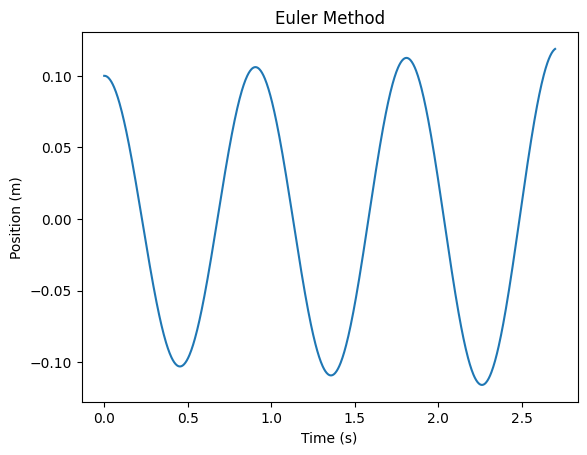

In [24]:
from pylab import *
from numpy import linspace
a=0        #Initial time. The units of a, b and h are all in seconds.
b=3*0.90   #Final time.
N=1000     #Number of points
h=(b-a)/N  #Time step (calculted)
x=0.10     #Initial value of position with the unit of m.
v=0        #Initial value of the velocity with the unit of m/s.
k=15.0     #the unit of k is N/m.
m=0.310    #the unit of m is kg.


#Here, we have defined an empty array for x.
xpoints=[]

tp=linspace(a,b,N)

for t in tp:
    xpoints.append(x)
    vn = v            # Temporarily store v_n in vn
    v=v-((k/m)*x)*h   # Calculate v_(n+1)
    x=x+vn*h          # Euler's method uses v_n to calculate x_(n+1)

plot(tp,xpoints)
xlabel('Time (s)')
ylabel('Position (m)')
title('Euler Method')
show()

### Euler's method limitation and improvement

You may notice an increasing amplitude in the plot. Euler's method famously has problems with oscillatory systems. It does not conserve energy, and we can show this by plotting the energy of the system using this algorithm and seeing that the energy increases with time.


A more stable algorithm is called Euler-Cromer. This updates the position with the *updated* velocity, as opposed to the old velocity. That is,

$v_{n+1}$ =$v_{n}$+$ha_{n}$

$x_{n+1}$ =$x_{n}$+$hv_{n+1}$

One can show that this algorithm conserves energy over long timescales, though it may oscillate around a mean value of energy.

We can use the program above to plot the energy of the system using the Euler's method. For that we can add another line in the *for* loop for calculating the energy of the system. To better see this effect, we will plot the energy over a three period time interval.

The code below shows that energy in Euler's method increases quadratically with time, while that with the Euler-Cromer method oscillates about a constant value.


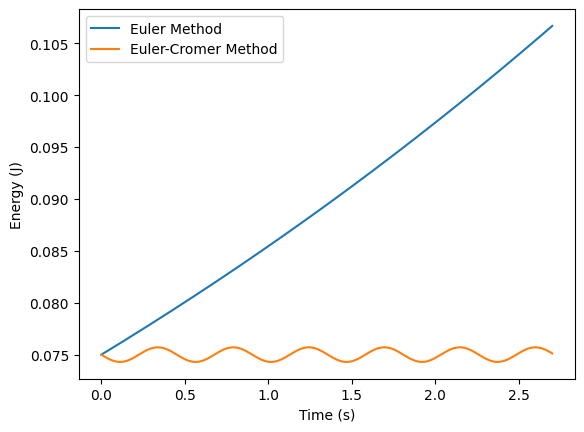

In [25]:
from pylab import *
from numpy import linspace
a=0        #Initial time. The units of a, b and h are all in seconds.
b=3*0.90   #Final time.
N=1000     #Number of points
h=(b-a)/N  #Time step (calculted)
xE=0.10     #Initial value of position with the unit of m.
xEC=xE    #Keep track of Euler-Cromer positions and velocities separately
vE=0        #Initial value of the velocity with the unit of m/s.
vEC=vE
k=15.0     #the unit of k is N/m.
m=0.310    #the unit of m is kg.
eE=0.5*k*(xE**2)      #This line calculates the total energy of the system
                    #to begin with and stores it as the first element of its
                    #array. The unit of e is J.
eEC=eE

#Here, we have defined an empty array for the energies.
Epoints=[]
ECpoints=[]

tp=linspace(a,b,N)

for t in tp:
    #Update the Euler method integration
    Epoints.append(eE)
    vEn = vE              # Temporarily store v_n in vEn
    vE=vE - ((k/m)*xE)*h  # Calculate v_(n+1)
    xE=xE+vEn*h           # Euler's method uses v_n to calculate x_(n+1)
    eE=0.5*k*(xE**2)+0.5*m*(vE**2)

    #Update the Euler-Cromer method integration
    ECpoints.append(eEC)
    vEC=vEC-((k/m)*xEC)*h
    xEC=xEC+vEC*h  #The Euler-Cromer method calculates x_(n+1) with x_n and v_(n+1)
    eEC=0.5*k*(xEC**2)+0.5*m*(vEC**2)


plot(tp,Epoints, label='Euler Method')
plot(tp,ECpoints, label='Euler-Cromer Method')
xlabel('Time (s)')
ylabel('Energy (J)')
legend()
show()


Here is the position-versus-time plot using the Euler-Cromer method.

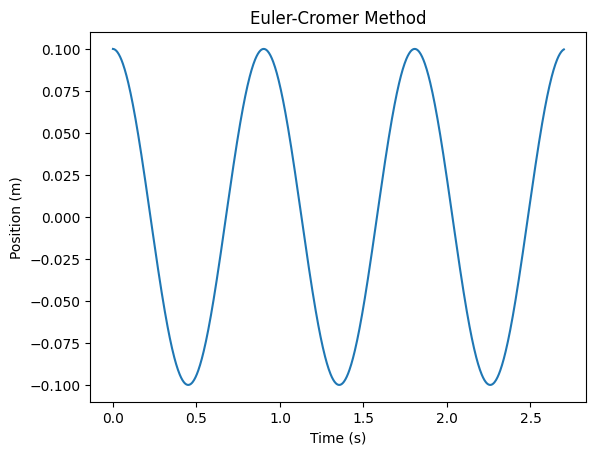

In [26]:
from pylab import *
from numpy import linspace
a=0        #Initial time. The units of a, b and h are all in seconds.
b=3*0.90   #Final time.
N=1000     #Number of points
h=(b-a)/N  #Time step (calculted)
x=0.10     #Initial value of position with the unit of m.
v=0        #Initial value of the velocity with the unit of m/s.
k=15.0     #the unit of k is N/m.
m=0.310    #the unit of m is kg.


#Here, we have defined an empty array for x.
xpoints=[]

tp=linspace(a,b,N)

for t in tp:
    xpoints.append(x)
    v=v-((k/m)*x)*h  # Calculate v_(n+1)
    x=x+v*h  #The Euler-Cromer method calculates x_(n+1) with x_n and v_(n+1)

plot(tp,xpoints)
xlabel('Time (s)')
ylabel('Position (m)')
title('Euler-Cromer Method')
show()